# ML Module-02: Feature Engineering

Data preprocessing, exploratory data analysis (EDA), feature selection, feature engineering, and data visualization are fundamental steps in the machine learning pipeline. They are crucial for building effective, robust, and interpretable models.

### i. Data Preprocessing:
This involves cleaning and transforming raw data into a format suitable for machine learning algorithms. It addresses issues such as missing values, outliers, noisy data, and inconsistent formats. Proper preprocessing ensures that the model receives high-quality data, which directly impacts its performance and reliability.

### ii. Exploratory Data Analysis (EDA):
EDA is an approach to analyzing and summarizing the main characteristics of a dataset, often with visual methods. It helps in understanding the data's structure, identifying patterns, detecting anomalies, and testing hypotheses. EDA provides valuable insights that guide subsequent steps like feature engineering and model selection.

### iii. Feature Selection:
This process involves choosing a subset of relevant features from the original dataset to be used in model training. The goal is to improve model performance, reduce overfitting, decrease training time, and enhance model interpretability by removing irrelevant or redundant features.

### iv. Feature Engineering:
Feature engineering is the process of creating new features from existing ones to improve the performance of machine learning models. This often involves domain knowledge and creativity to transform raw data into representations that are more informative and discriminative for the learning algorithm.

### v. Data Visualization:
Data visualization is the graphical representation of data. It is a powerful tool used throughout the machine learning pipeline, from EDA to presenting model results. Visualizations help in understanding data distributions, relationships between variables, identifying patterns, and communicating findings effectively.

## i. Data Preprocessing

Various data cleaning and preparation techniques with code examples using a benchmark dataset. This includes handling missing values, outliers, and data type conversions.


**Activity**:
Load a benchmark dataset with missing values, outliers, and mixed data types to demonstrate data preprocessing techniques.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load a dataset suitable for demonstrating preprocessing techniques.
# The "Titanic" dataset is a good choice as it contains missing values,
# outliers, and mixed data types.
try:
    df = sns.load_dataset('titanic')
except:
    print("Titanic dataset not found, please download it.")
    df = pd.DataFrame() # Create an empty dataframe to avoid errors

if not df.empty:
    # Display initial info about the dataset
    print("Initial dataset information:")
    df.info()

    # Display the first few rows
    print("\nFirst 5 rows of the dataset:")
    display(df.head())

Initial dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

First 5 rows of the dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Activity**:
Identify and handle missing values in the dataset. Explain and demonstrate common techniques like dropping rows/columns or imputation.



In [3]:
# Handling Missing Values

print("Identifying missing values:")
print(df.isnull().sum())

# Drop columns with a high percentage of missing values, like 'deck'.
# A threshold can be set, e.g., drop columns with more than 50% missing values.
missing_threshold = len(df) * 0.5
df_cleaned = df.dropna(axis=1, thresh=missing_threshold)
print("\nColumns remaining after dropping columns with high missing values:")
print(df_cleaned.columns)

# Handle missing values in 'age' by imputation (e.g., using the median)
# Handling missing values in 'embarked' and 'embark_town' by imputation (e.g., using the mode)
# Check which columns still have missing values
print("\nMissing values after dropping 'deck':")
print(df_cleaned.isnull().sum())

# Impute missing 'age' values with the median
if 'age' in df_cleaned.columns:
    df_cleaned['age'].fillna(df_cleaned['age'].median(), inplace=True)

# Impute missing 'embarked' and 'embark_town' values with the mode
if 'embarked' in df_cleaned.columns:
    df_cleaned['embarked'].fillna(df_cleaned['embarked'].mode()[0], inplace=True)
if 'embark_town' in df_cleaned.columns:
    df_cleaned['embark_town'].fillna(df_cleaned['embark_town'].mode()[0], inplace=True)

print("\nMissing values after imputation:")
print(df_cleaned.isnull().sum())

# Display the first few rows of the cleaned DataFrame
print("\nFirst 5 rows after handling missing values:")
display(df_cleaned.head())

Identifying missing values:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Columns remaining after dropping columns with high missing values:
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

Missing values after dropping 'deck':
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

Missing values after imputation:
survived       0
pclass         0
sex            0
age            0
sibsp

/tmp/ipython-input-1785939961.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['age'].fillna(df_cleaned['age'].median(), inplace=True)
/tmp/ipython-input-1785939961.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['age'].fillna(df_cleaned['age'].median(), inplace=True)
/tmp/ipython-input-1785939961.py:25: FutureWa

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


**Activity**:
Explain and demonstrate how to identify and handle outliers in numerical columns using methods such as IQR.

**The Interquartile Range (IQR)** evaluates the variability by dividing a dataset into four quartiles and the difference between the third quartile (Q3) and the first quartile (Q1) in a dataset represents the spread of the middle 50% of the data.

**Interquartile range = Upper Quartile – Lower Quartile**






Identifying outliers:

Numerical columns for outlier detection: ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


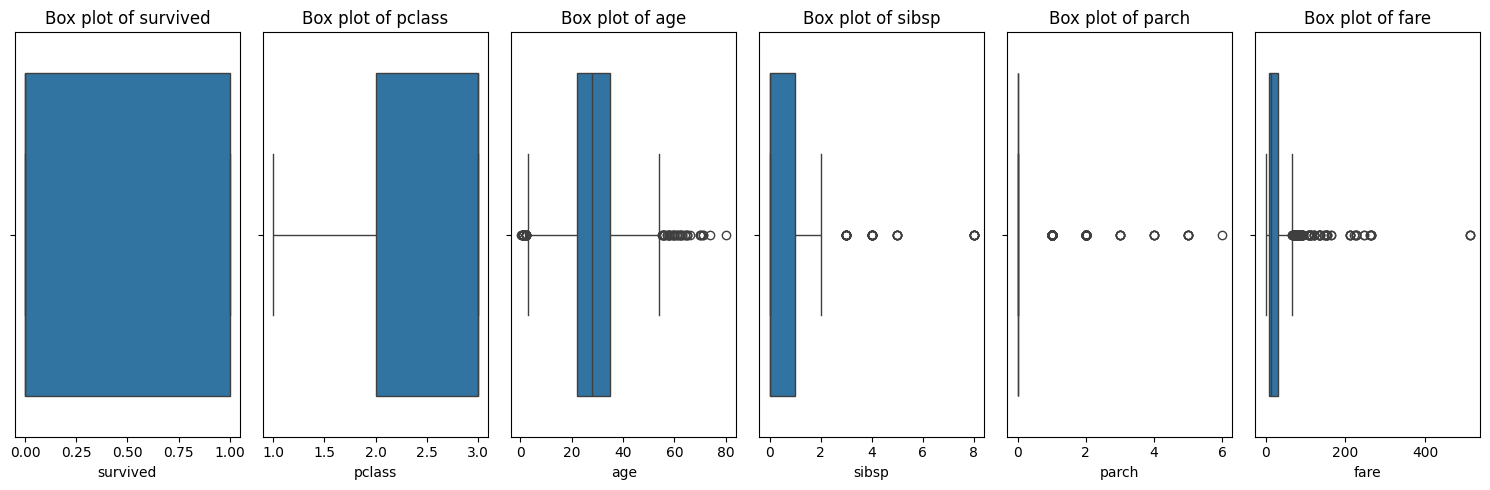


IQR method for 'fare':
Q1: 7.9104, Q3: 31.0, IQR: 23.0896
Lower Bound for outliers: -26.724
Upper Bound for outliers: 65.6344

Number of outliers in 'fare': 116
Examples of outliers in 'fare':


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,Southampton,no,False
31,1,1,female,28.0,1,0,146.5208,C,First,woman,False,Cherbourg,yes,False
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,Cherbourg,no,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,Cherbourg,yes,False



'fare' column after capping outliers:


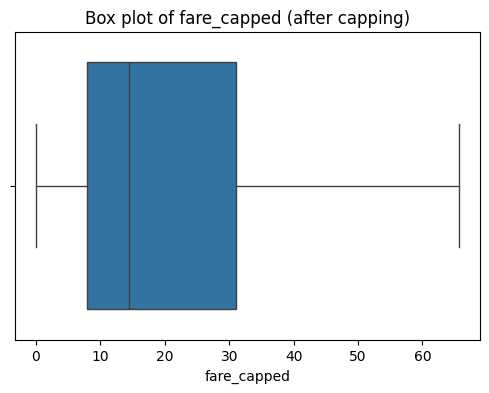


First 5 rows after capping 'fare' outliers:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_capped
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,7.2500
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,65.6344
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,7.9250
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,53.1000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,8.0500


In [4]:
# Handling Outliers

print("\nIdentifying outliers:")
# Use box plots to visualize potential outliers in numerical columns
numerical_cols = df_cleaned.select_dtypes(include=np.number).columns.tolist()
print(f"\nNumerical columns for outlier detection: {numerical_cols}")

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

# Demonstrate outlier handling using the IQR method for 'fare'
# Calculate Q1, Q3, and IQR for 'fare'
Q1 = df_cleaned['fare'].quantile(0.25)
Q3 = df_cleaned['fare'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nIQR method for 'fare':")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound for outliers: {lower_bound}")
print(f"Upper Bound for outliers: {upper_bound}")

# Identify outliers
outliers = df_cleaned[(df_cleaned['fare'] < lower_bound) | (df_cleaned['fare'] > upper_bound)]
print(f"\nNumber of outliers in 'fare': {len(outliers)}")
print("Examples of outliers in 'fare':")
display(outliers.head())

# Option to handle outliers: capping (replace outliers with the bounds)
df_cleaned['fare_capped'] = np.where(df_cleaned['fare'] > upper_bound, upper_bound,
                                    np.where(df_cleaned['fare'] < lower_bound, lower_bound, df_cleaned['fare']))

print("\n'fare' column after capping outliers:")
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_cleaned['fare_capped'])
plt.title('Box plot of fare_capped (after capping)')
plt.show()

# Display the first few rows with the new capped column
print("\nFirst 5 rows after capping 'fare' outliers:")
display(df_cleaned.head())

**Activity**:
Explain and demonstrate how to convert data types as necessary for analysis and modeling.



In [5]:
# Data Type Conversion

print("\nData Type Conversion:")
print("Current data types:")
print(df_cleaned.dtypes)

# Convert categorical columns to 'category' dtype for memory efficiency and potential modeling benefits
categorical_cols = ['sex', 'embarked', 'class', 'who', 'embark_town', 'alive']
for col in categorical_cols:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].astype('category')

# Convert boolean columns to integer (0/1) if needed for certain models
boolean_cols = ['adult_male', 'alone']
for col in boolean_cols:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].astype(int)

print("\nData types after conversion:")
print(df_cleaned.dtypes)

# Display the first few rows to show the changes
print("\nFirst 5 rows after data type conversion:")
display(df_cleaned.head())


Data Type Conversion:
Current data types:
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
fare_capped     float64
dtype: object

Data types after conversion:
survived          int64
pclass            int64
sex            category
age             float64
sibsp             int64
parch             int64
fare            float64
embarked       category
class          category
who            category
adult_male        int64
embark_town    category
alive          category
alone             int64
fare_capped     float64
dtype: object

First 5 rows after data type conversion:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_capped
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,Southampton,no,0,7.2500
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,Cherbourg,yes,0,65.6344
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,Southampton,yes,1,7.9250
3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,Southampton,yes,0,53.1000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,Southampton,no,1,8.0500


## ii. Exploratory Data Analysis (EDA)

Detail techniques for summarizing and visualizing data to understand its characteristics; including code for descriptive statistics, correlation analysis, and distribution plots using the benchmark dataset.


**Activity**:
Calculate and display descriptive statistics for the numerical columns in the `df_cleaned` DataFrame.



In [6]:
# 1. Calculate and display descriptive statistics for numerical columns
print("Descriptive statistics for numerical columns:")
display(df_cleaned.select_dtypes(include=np.number).describe())

Descriptive statistics for numerical columns:


,survived,pclass,age,sibsp,parch,fare,adult_male,alone,fare_capped
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.602694,0.602694,24.046813
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.489615,0.489615,20.481625
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,65.634400


**Activity**:
Calculate and visualize the correlation matrix for the numerical columns in `df_cleaned`.



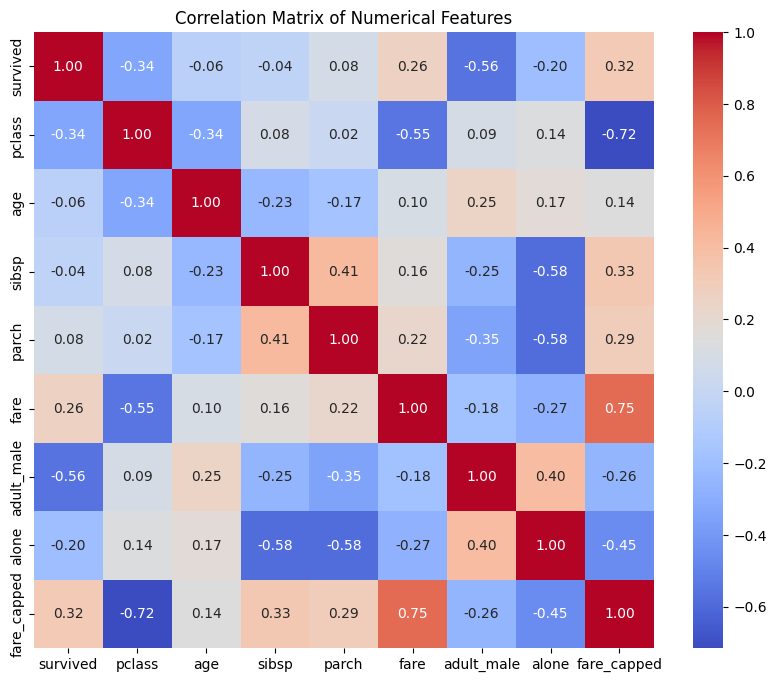

In [7]:
# 2. Calculate the correlation matrix for numerical columns
numerical_df = df_cleaned.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

# 3. Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Activity**:
Generate distribution plots for key numerical columns and count plots for key categorical columns in `df_cleaned`.




Distribution plots for key numerical columns:


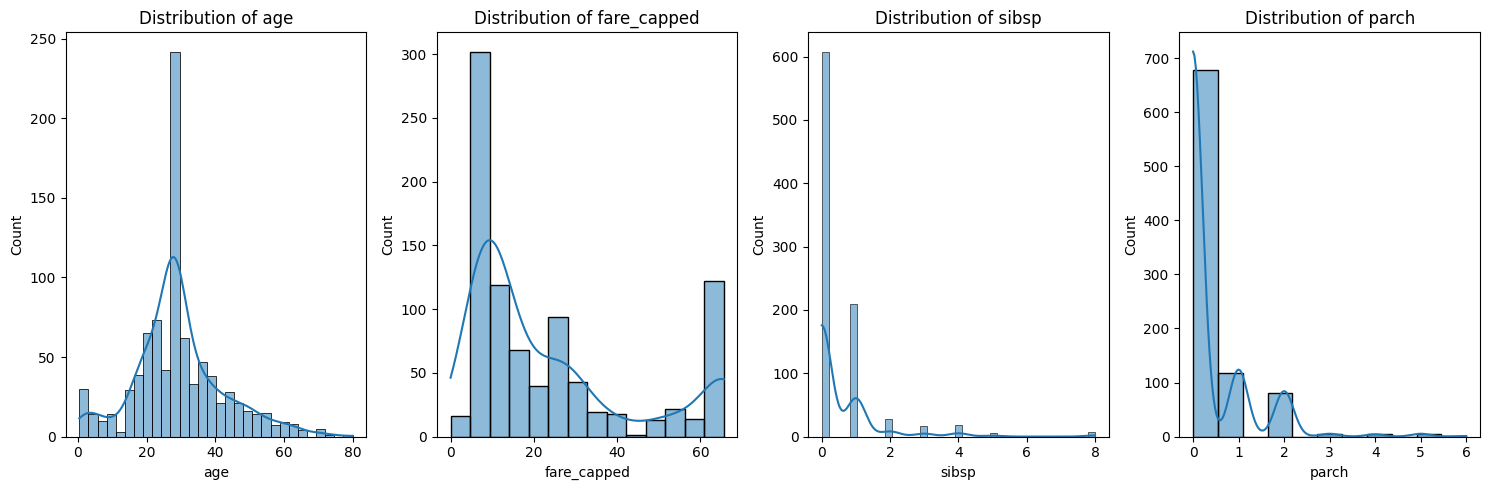


Count plots for key categorical columns:


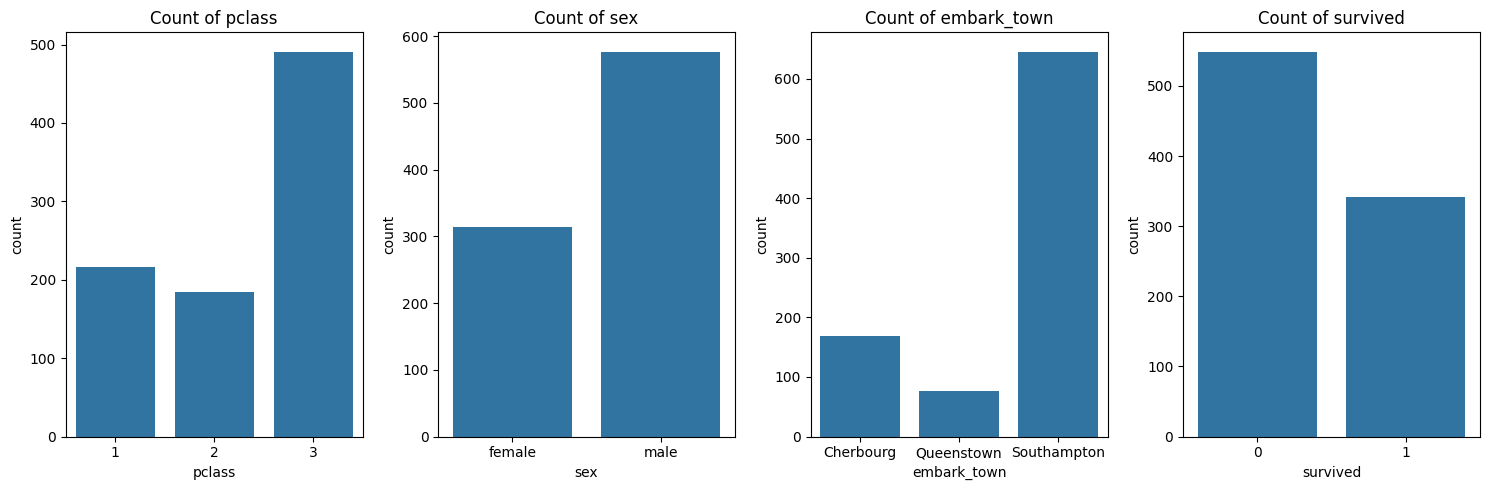

In [8]:
# 4. Generate distribution plots for key numerical columns
print("\nDistribution plots for key numerical columns:")
numerical_cols_to_plot = ['age', 'fare_capped', 'sibsp', 'parch']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols_to_plot):
    plt.subplot(1, len(numerical_cols_to_plot), i + 1)
    sns.histplot(data=df_cleaned, x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 5. Generate count plots for key categorical columns
print("\nCount plots for key categorical columns:")
categorical_cols_to_plot = ['pclass', 'sex', 'embark_town', 'survived']
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols_to_plot):
    plt.subplot(1, len(categorical_cols_to_plot), i + 1)
    sns.countplot(data=df_cleaned, x=col)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

## iii. Feature Selection

Explain methods for selecting relevant features to improve model performance and reduce dimensionality with examples for techniques like filter methods, wrapper methods, and embedded methods applied to the benchmark dataset.


**Activity**:
Explain feature selection and its importance, describe filter methods with correlation as an example, and code to demonstrate correlation-based feature selection.



In [9]:
# 1. Explain the concept of feature selection and its importance
print("## Feature Selection")
print("\nFeature selection is the process of choosing a subset of relevant features (variables, predictors) to use in a machine learning model. The goal is to improve model performance, reduce overfitting, decrease training time, and enhance model interpretability by removing irrelevant or redundant features.")
print("\nImportance of Feature Selection:")
print("- **Improved Model Performance:** By removing noisy or irrelevant features, models can often learn more effectively and generalize better to new data.")
print("- **Reduced Overfitting:** Fewer features reduce the complexity of the model, making it less likely to overfit the training data.")
print("- **Faster Training Times:** Training a model on a smaller subset of features is computationally less expensive and faster.")
print("- **Enhanced Model Interpretability:** Models with fewer features are often easier to understand and explain.")
print("- **Reduced Data Collection Costs:** Identifying the most important features can guide future data collection efforts.")

# 2. Describe filter methods
print("\n### Filter Methods")
print("\nFilter methods select features based on statistical measures, independent of the machine learning algorithm. They 'filter' out features based on criteria like correlation, mutual information, or statistical tests (e.g., chi-squared).")
print("\nExample: Correlation")
print("Correlation measures the linear relationship between two variables. Features with high correlation to the target variable are often considered more relevant. We can use the correlation matrix to identify features strongly correlated with the 'survived' column.")

# 3. Provide a code example demonstrating a filter method (correlation)
print("\nDemonstrating Filter Method (Correlation with 'survived'):")
# Use the pre-computed correlation_matrix
print("\nCorrelation of numerical features with 'survived':")
display(correlation_matrix['survived'].sort_values(ascending=False))

# We can set a threshold to select features with a certain level of correlation
correlation_threshold = 0.1 # Example threshold
relevant_features_corr = correlation_matrix.columns[abs(correlation_matrix['survived']) > correlation_threshold].tolist()

print(f"\nNumerical features with absolute correlation > {correlation_threshold} with 'survived':")
print(relevant_features_corr)

# Note: 'survived' is the target variable itself, so it will always be included.
# We typically exclude the target variable when selecting features.
if 'survived' in relevant_features_corr:
    relevant_features_corr.remove('survived')

print(f"\nSelected numerical features based on correlation with 'survived' (excluding 'survived'):")
print(relevant_features_corr)

# We can now create a new dataframe with these selected features for modeling
numerical_df_filtered_corr = numerical_df[relevant_features_corr]
print("\nFirst 5 rows of the numerical dataframe with correlation-selected features:")
display(numerical_df_filtered_corr.head())

## Feature Selection

Feature selection is the process of choosing a subset of relevant features (variables, predictors) to use in a machine learning model. The goal is to improve model performance, reduce overfitting, decrease training time, and enhance model interpretability by removing irrelevant or redundant features.

Importance of Feature Selection:
- **Improved Model Performance:** By removing noisy or irrelevant features, models can often learn more effectively and generalize better to new data.
- **Reduced Overfitting:** Fewer features reduce the complexity of the model, making it less likely to overfit the training data.
- **Faster Training Times:** Training a model on a smaller subset of features is computationally less expensive and faster.
- **Enhanced Model Interpretability:** Models with fewer features are often easier to understand and explain.
- **Reduced Data Collection Costs:** Identifying the most important features can guide future data collection efforts.

### Fil

,survived
survived,1.000000
fare_capped,0.317430
fare,0.257307
parch,0.081629
sibsp,-0.035322
age,-0.064910
alone,-0.203367
pclass,-0.338481
adult_male,-0.557080



Numerical features with absolute correlation > 0.1 with 'survived':
['survived', 'pclass', 'fare', 'adult_male', 'alone', 'fare_capped']

Selected numerical features based on correlation with 'survived' (excluding 'survived'):
['pclass', 'fare', 'adult_male', 'alone', 'fare_capped']

First 5 rows of the numerical dataframe with correlation-selected features:


,pclass,fare,adult_male,alone,fare_capped
0,3,7.2500,1,0,7.2500
1,1,71.2833,0,0,65.6344
2,3,7.9250,0,1,7.9250
3,1,53.1000,0,0,53.1000
4,3,8.0500,1,1,8.0500


**Activity**:
Describe wrapper methods with Recursive Feature Elimination (RFE) as an example, and provide a conceptual explanation of applying RFE with Logistic Regression.



In [10]:
# 4. Describe wrapper methods
print("\n### Wrapper Methods")
print("\nWrapper methods use a specific machine learning model to evaluate the performance of different subsets of features. They 'wrap' the feature selection process around the model training. Examples include Recursive Feature Elimination (RFE), Forward Selection, and Backward Elimination.")
print("\nExample: Recursive Feature Elimination (RFE)")
print("RFE works by recursively removing features and building a model on the remaining features. It uses the model's performance metric (e.g., accuracy, F1-score) to rank the features. The process starts with all features and removes the least important feature (based on the model's coefficients or feature importance) in each iteration until the desired number of features is reached.")

# 5. Provide a conceptual explanation of applying a wrapper method (RFE)
print("\nConceptual Explanation of Applying RFE with Logistic Regression:")
print("To apply RFE, you would typically follow these steps:")
print("a. Split the dataset into training and testing sets to evaluate the model's performance on unseen data.")
print("b. Choose a machine learning model that provides information about feature importance (e.g., Logistic Regression, which uses coefficients as indicators of importance, or tree-based models that provide feature importance scores).")
print("c. Initialize the RFE selector with the chosen model and the desired number of features to select (or a step size for feature removal).")
print("d. Fit the RFE selector to the training data. RFE will internally train the model, rank features, and recursively eliminate the least important ones.")
print("e. The RFE object will then provide the ranking of features and indicate which features were selected.")
print("f. You can then train your final model using only the selected features and evaluate its performance on the testing set.")
print("\nNote: Implementing RFE involves model training and iteration, which can be computationally intensive and requires splitting the data, fitting the model within the RFE loop, and evaluating performance. For this demonstration, we provide a conceptual overview rather than a full code implementation.")


### Wrapper Methods

Wrapper methods use a specific machine learning model to evaluate the performance of different subsets of features. They 'wrap' the feature selection process around the model training. Examples include Recursive Feature Elimination (RFE), Forward Selection, and Backward Elimination.

Example: Recursive Feature Elimination (RFE)
RFE works by recursively removing features and building a model on the remaining features. It uses the model's performance metric (e.g., accuracy, F1-score) to rank the features. The process starts with all features and removes the least important feature (based on the model's coefficients or feature importance) in each iteration until the desired number of features is reached.

Conceptual Explanation of Applying RFE with Logistic Regression:
To apply RFE, you would typically follow these steps:
a. Split the dataset into training and testing sets to evaluate the model's performance on unseen data.
b. Choose a machine learning model that pro

**Activity**:
Describe embedded methods with Lasso as an example, and provide a conceptual explanation of applying Lasso for feature selection.



In [11]:
# 6. Describe embedded methods
print("\n### Embedded Methods")
print("\nEmbedded methods perform feature selection as part of the model training process. These methods have built-in feature selection mechanisms that select the most relevant features during model construction. Examples include Lasso (L1 regularization), Ridge (L2 regularization), and tree-based models (like Random Forests or Gradient Boosting) which can provide feature importance scores.")
print("\nExample: Using Coefficients from Linear Models with L1 Regularization (Lasso)")
print("Lasso is a linear model that uses L1 regularization. L1 regularization adds a penalty to the absolute values of the model's coefficients. This penalty encourages the model to shrink the coefficients of less important features towards zero. Features with non-zero coefficients after training are considered selected.")

# 7. Provide a conceptual explanation of applying an embedded method (Lasso)
print("\nConceptual Explanation of Applying an Embedded Method (Lasso) for Feature Selection:")
print("To apply Lasso for feature selection, you would typically follow these steps:")
print("a. Prepare your data, including handling categorical features (e.g., using one-hot encoding) as linear models require numerical input.")
print("b. Split the dataset into training and testing sets.")
print("c. Choose a Lasso regression model (for regression tasks) or a Logistic Regression model with L1 penalty (for classification tasks).")
print("d. Train the chosen model on the training data.")
print("e. After training, examine the coefficients of the features. Features with coefficients that have been shrunk to zero by the L1 penalty are effectively removed by the model.")
print("f. You can then select the features with non-zero coefficients and use this subset of features for building your final model (potentially a different model or the same model without regularization if you only used Lasso for selection).")
print("\nNote: Implementing Lasso for feature selection involves training a model with regularization, which requires data preparation steps like scaling and handling categorical variables appropriately for linear models. For this demonstration, we provide a conceptual overview rather than a full code implementation.")


### Embedded Methods

Embedded methods perform feature selection as part of the model training process. These methods have built-in feature selection mechanisms that select the most relevant features during model construction. Examples include Lasso (L1 regularization), Ridge (L2 regularization), and tree-based models (like Random Forests or Gradient Boosting) which can provide feature importance scores.

Example: Using Coefficients from Linear Models with L1 Regularization (Lasso)
Lasso is a linear model that uses L1 regularization. L1 regularization adds a penalty to the absolute values of the model's coefficients. This penalty encourages the model to shrink the coefficients of less important features towards zero. Features with non-zero coefficients after training are considered selected.

Conceptual Explanation of Applying an Embedded Method (Lasso) for Feature Selection:
To apply Lasso for feature selection, you would typically follow these steps:
a. Prepare your data, including 

## iv. Feature Engineering

Techniques for creating new features or transforming existing ones to enhance the predictive power of models that includes creating polynomial features, interaction terms, and handling categorical variables using the benchmark dataset.


**Activity**:
Explain the concept of feature engineering and its importance.



In [12]:
# 1. Explain the concept of feature engineering and its importance
print("## Feature Engineering")
print("\nFeature engineering is the process of creating new features or transforming existing ones from the raw data to help a machine learning model better understand the underlying patterns and improve its predictive performance.")
print("\nImportance of Feature Engineering:")
print("- **Improved Model Performance:** Well-engineered features can capture complex relationships in the data that the raw features might not, leading to more accurate predictions.")
print("- **Compatibility with Models:** Some models work better with specific types of features (e.g., linear models with scaled numerical data, tree-based models with categorical data). Feature engineering helps prepare data in the right format.")
print("- **Domain Knowledge Integration:** Domain expertise is often crucial in identifying and creating features that are relevant and informative for the specific problem.")
print("- **Handling Non-linear Relationships:** Creating polynomial features or interaction terms can help linear models capture non-linear relationships.")
print("- **Dimensionality Reduction (sometimes):** Techniques like PCA or feature extraction can be considered feature engineering methods that reduce the number of features while retaining important information.")

## Feature Engineering

Feature engineering is the process of creating new features or transforming existing ones from the raw data to help a machine learning model better understand the underlying patterns and improve its predictive performance.

Importance of Feature Engineering:
- **Improved Model Performance:** Well-engineered features can capture complex relationships in the data that the raw features might not, leading to more accurate predictions.
- **Compatibility with Models:** Some models work better with specific types of features (e.g., linear models with scaled numerical data, tree-based models with categorical data). Feature engineering helps prepare data in the right format.
- **Domain Knowledge Integration:** Domain expertise is often crucial in identifying and creating features that are relevant and informative for the specific problem.
- **Handling Non-linear Relationships:** Creating polynomial features or interaction terms can help linear models capture non-linear r

**Activity**:
Describe polynomial features and provide code to create them using the 'age' column.



In [13]:
# 2. Describe techniques for creating polynomial features
print("\n### Polynomial Features")
print("\nPolynomial features are created by raising existing numerical features to a certain power or by multiplying them together (which also creates interaction terms, discussed next). This technique helps models capture non-linear relationships between features and the target variable.")
print("\nWhy are they useful?")
print("If a linear model assumes a linear relationship between a feature and the target, but the actual relationship is quadratic (e.g., y = ax^2 + bx + c), adding a polynomial feature (x^2) allows the model to learn this non-linear pattern.")

# 3. Provide a code example to demonstrate the creation of polynomial features
print("\nDemonstrating Creation of Polynomial Features for 'age':")
from sklearn.preprocessing import PolynomialFeatures

# Select the column(s) for which to create polynomial features.
# PolynomialFeatures expects a 2D array, so we reshape the column.
age_column = df_cleaned[['age']].dropna() # Drop NaNs for simplicity in this example

# Initialize PolynomialFeatures. 'degree' specifies the maximum degree.
# 'include_bias=False' prevents adding a column of all ones (intercept).
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the data
age_poly = poly.fit_transform(age_column)

# Create a DataFrame from the results
# The feature names will be 'age', 'age^2'
age_poly_df = pd.DataFrame(age_poly, columns=poly.get_feature_names_out(['age']), index=age_column.index)

print("\nFirst 5 rows of the original 'age' column (without NaNs):")
display(age_column.head())

print("\nFirst 5 rows with polynomial features for 'age':")
display(age_poly_df.head())

# Add the polynomial features back to the main dataframe.
# We need to align by index, handling potential NaNs introduced by the merge/join
df_cleaned = df_cleaned.join(age_poly_df, how='left')

print("\nFirst 5 rows of df_cleaned with new polynomial 'age' features:")
display(df_cleaned.head())


### Polynomial Features

Polynomial features are created by raising existing numerical features to a certain power or by multiplying them together (which also creates interaction terms, discussed next). This technique helps models capture non-linear relationships between features and the target variable.

Why are they useful?
If a linear model assumes a linear relationship between a feature and the target, but the actual relationship is quadratic (e.g., y = ax^2 + bx + c), adding a polynomial feature (x^2) allows the model to learn this non-linear pattern.

Demonstrating Creation of Polynomial Features for 'age':

First 5 rows of the original 'age' column (without NaNs):


,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0



First 5 rows with polynomial features for 'age':


,age,age^2
0,22.0,484.0
1,38.0,1444.0
2,26.0,676.0
3,35.0,1225.0
4,35.0,1225.0


ValueError: columns overlap but no suffix specified: Index(['age'], dtype='object')

**Observation**:
The previous attempt to join the polynomial features DataFrame to `df_cleaned` failed because of overlapping column names ('age'). The `age_poly_df` contains both the original 'age' column and the new 'age^2' column. The `df_cleaned` also contains the original 'age' column. The join needs to handle this overlap. Modifying the join command to specify suffixes to distinguish the overlapping columns, or better yet, just drop the redundant 'age' column from `age_poly_df` before joining since `df_cleaned` already has the original 'age'. Finally, display the head of `df_cleaned` to confirm the join was successful.



In [14]:
# Add the polynomial features back to the main dataframe.
# Drop the original 'age' column from age_poly_df before joining to avoid overlap
age_poly_df_no_original_age = age_poly_df.drop(columns=['age'])

# Join the polynomial features dataframe (without the original 'age' column)
# Use how='left' to keep all rows from df_cleaned
df_cleaned = df_cleaned.join(age_poly_df_no_original_age, how='left')

print("\nFirst 5 rows of df_cleaned with new polynomial 'age^2' feature:")
display(df_cleaned.head())


First 5 rows of df_cleaned with new polynomial 'age^2' feature:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_capped,age^2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,Southampton,no,0,7.2500,484.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,Cherbourg,yes,0,65.6344,1444.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,Southampton,yes,1,7.9250,676.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,Southampton,yes,0,53.1000,1225.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,Southampton,no,1,8.0500,1225.0


**Activity**:
Describe interaction terms and provide code to create one between 'age' and 'fare_capped'.



In [15]:
# 4. Describe techniques for creating interaction terms
print("\n### Interaction Terms")
print("\nInteraction terms are created by multiplying two or more features together. They capture the combined effect of features that might be more than the sum of their individual effects. For example, the effect of 'age' on survival might depend on the 'fare' paid.")
print("\nWhy are they useful?")
print("If the relationship between a feature and the target changes depending on the value of another feature, an interaction term can help the model capture this conditional relationship. For instance, the impact of age on survival might be different for passengers who paid a high fare compared to those who paid a low fare.")

# 5. Provide a code example to demonstrate the creation of an interaction term
print("\nDemonstrating Creation of an Interaction Term ('age' * 'fare_capped'):")

# Create the interaction term. Handle potential NaNs by filling before multiplication
# or ensuring columns are aligned correctly and NaNs propagate.
# We'll use a simple multiplication after ensuring both columns are numerical and handling potential NaNs for this example.
# Note: A more robust approach would involve imputation or using a pipeline with a imputer before feature creation.
df_cleaned['age_fare_interaction'] = df_cleaned['age'] * df_cleaned['fare_capped']

print("\nFirst 5 rows of df_cleaned with the new interaction term 'age_fare_interaction':")
display(df_cleaned.head())


### Interaction Terms

Interaction terms are created by multiplying two or more features together. They capture the combined effect of features that might be more than the sum of their individual effects. For example, the effect of 'age' on survival might depend on the 'fare' paid.

Why are they useful?
If the relationship between a feature and the target changes depending on the value of another feature, an interaction term can help the model capture this conditional relationship. For instance, the impact of age on survival might be different for passengers who paid a high fare compared to those who paid a low fare.

Demonstrating Creation of an Interaction Term ('age' * 'fare_capped'):

First 5 rows of df_cleaned with the new interaction term 'age_fare_interaction':


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_capped,age^2,age_fare_interaction
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,Southampton,no,0,7.2500,484.0,159.5000
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,Cherbourg,yes,0,65.6344,1444.0,2494.1072
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,Southampton,yes,1,7.9250,676.0,206.0500
3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,Southampton,yes,0,53.1000,1225.0,1858.5000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,Southampton,no,1,8.0500,1225.0,281.7500


## v. Data Visualization

Aid in understanding data patterns and relationships using various plots like scatter plots, bar plots, histograms, and heatmaps using the benchmark dataset.


**Activity**:
Explain the importance of data visualization and describe different types of visualizations including scatter plots, bar plots, histograms, and heatmaps.



In [16]:
print("## Data Visualization")
print("\nData visualization is a critical step in the data science workflow. It involves representing data graphically to help in understanding patterns, trends, and relationships that might not be obvious from raw data or summary statistics.")
print("\nImportance of Data Visualization:")
print("- **Understanding Data:** Visualizations make complex datasets understandable at a glance.")
print("- **Identifying Patterns and Trends:** Plots can reveal underlying patterns, trends, seasonality, and cycles in the data.")
print("- **Detecting Anomalies and Outliers:** Visualizations like box plots or scatter plots can easily highlight outliers or unusual data points.")
print("- **Communicating Findings:** Visualizations are powerful tools for presenting insights and findings to both technical and non-technical audiences.")
print("- **Guiding Model Selection and Feature Engineering:** Visual exploration can suggest which features are important and what kind of relationships exist, informing the choice of models and necessary feature engineering.")

print("\n### Types of Visualizations and Their Applications:")

print("\n**Scatter Plots:**")
print("Scatter plots are used to visualize the relationship between two numerical variables. Each point on the plot represents an observation, with its position determined by the values of the two variables. They are useful for identifying correlations, clusters, and outliers.")
print("Use Case: To see if there is a linear or non-linear relationship between age and fare, or to identify if certain age groups paid significantly higher or lower fares.")

print("\n**Bar Plots:**")
print("Bar plots are used to compare quantities across different categories. They display rectangular bars with lengths proportional to the values they represent. Bar plots are suitable for visualizing the distribution of a categorical variable or comparing a numerical measure across categories.")
print("Use Case: To compare the survival rate across different passenger classes, genders, or embarkation points.")

print("\n**Histograms:**")
print("Histograms are used to display the distribution of a single numerical variable. They divide the data into bins and show the number or frequency of observations falling into each bin. Histograms help in understanding the shape of the distribution, identifying peaks, and assessing variability.")
print("Use Case: To understand the distribution of passenger ages or fares, and see if they are skewed or normally distributed.")

print("\n**Heatmaps:**")
print("Heatmaps are graphical representations of data where values are depicted by color. They are often used to visualize matrices, such as correlation matrices. Heatmaps make it easy to identify patterns and relationships across two dimensions by observing the color intensity.")
print("Use Case: To visualize the correlation between multiple numerical features in a dataset, quickly identifying which pairs of features are strongly correlated (positively or negatively).")

## Data Visualization

Data visualization is a critical step in the data science workflow. It involves representing data graphically to help in understanding patterns, trends, and relationships that might not be obvious from raw data or summary statistics.

Importance of Data Visualization:
- **Understanding Data:** Visualizations make complex datasets understandable at a glance.
- **Identifying Patterns and Trends:** Plots can reveal underlying patterns, trends, seasonality, and cycles in the data.
- **Detecting Anomalies and Outliers:** Visualizations like box plots or scatter plots can easily highlight outliers or unusual data points.
- **Communicating Findings:** Visualizations are powerful tools for presenting insights and findings to both technical and non-technical audiences.
- **Guiding Model Selection and Feature Engineering:** Visual exploration can suggest which features are important and what kind of relationships exist, informing the choice of models and necessary feature 

**Activity**:
Provide code examples for creating a scatter plot, bar plot, histogram, and heatmap using the `df_cleaned` DataFrame to demonstrate different visualization types and their applications.



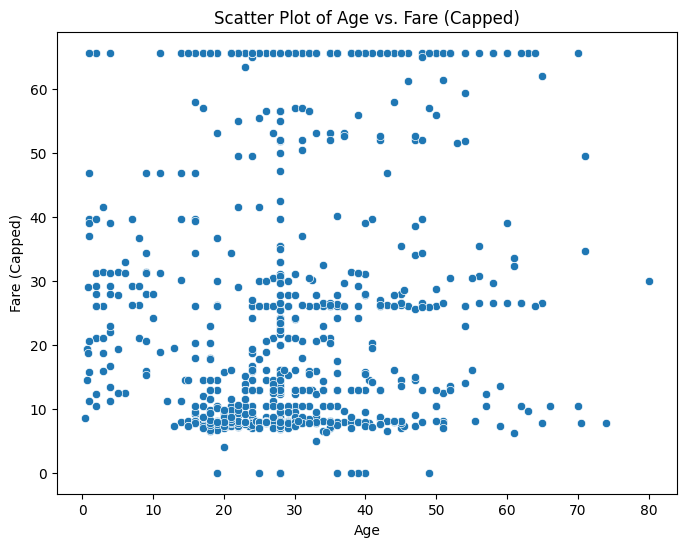

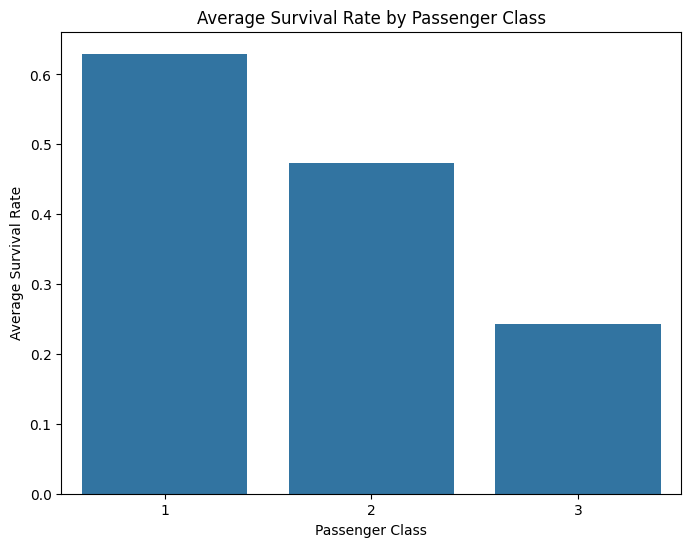

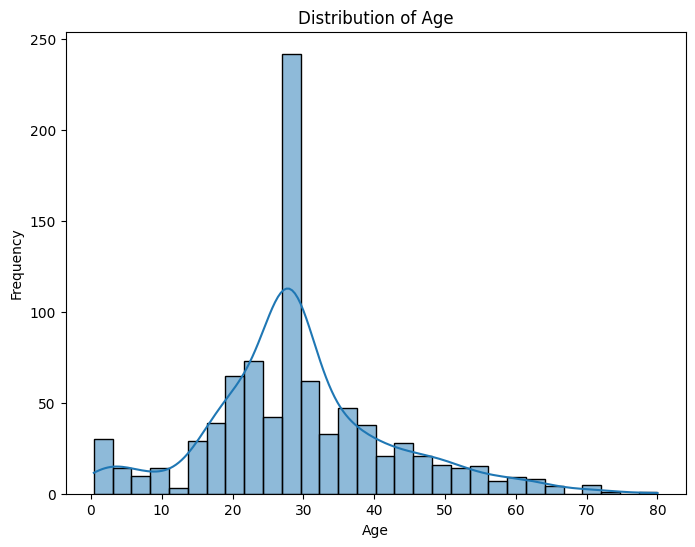

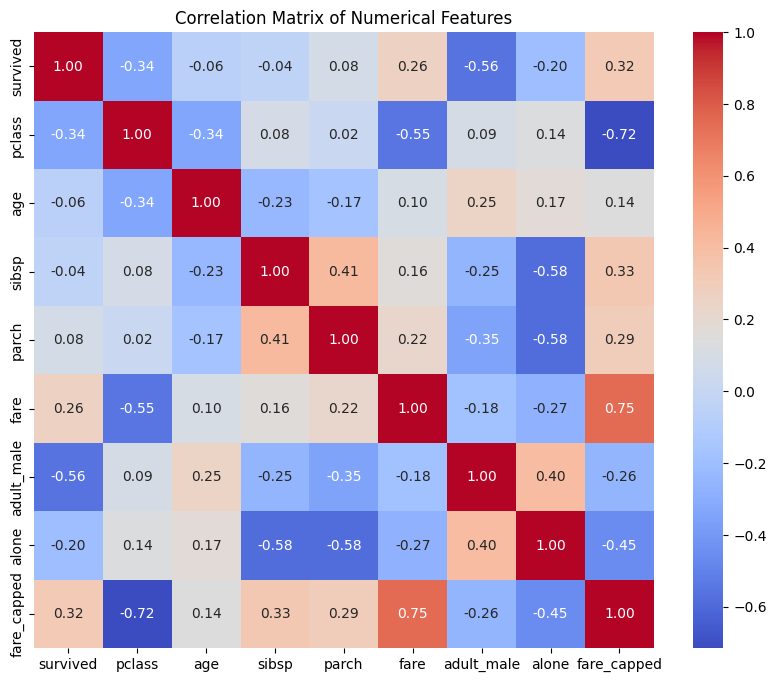

In [17]:
# 3. Create a scatter plot to visualize the relationship between 'age' and 'fare_capped'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='age', y='fare_capped')
plt.title('Scatter Plot of Age vs. Fare (Capped)')
plt.xlabel('Age')
plt.ylabel('Fare (Capped)')
plt.show()

# 4. Create a bar plot to visualize the relationship between 'pclass' and average 'survived' rate
plt.figure(figsize=(8, 6))
sns.barplot(data=df_cleaned, x='pclass', y='survived', errorbar=None) # errorbar=None to hide error bars for simplicity
plt.title('Average Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Survival Rate')
plt.show()

# 5. Create a histogram to visualize the distribution of 'age'
plt.figure(figsize=(8, 6))
sns.histplot(data=df_cleaned, x='age', kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 6. Create a heatmap to visualize the correlation matrix of numerical features
# Reuse the correlation_matrix calculated in the EDA step
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## vi. Application on Benchmark Dataset

Demonstrate the application of all the discussed techniques sequentially on a chosen benchmark dataset, showing the impact of each step on the data.


**Activity**:
Load the dataset again to start with the raw data and display its initial state to show the starting point before applying any preprocessing steps.



In [18]:
# 1. Load the chosen benchmark dataset again to start with the raw data.
# We will use the 'titanic' dataset again as the benchmark.
try:
    df_raw = sns.load_dataset('titanic')
except:
    print("Titanic dataset not found, please download it.")
    df_raw = pd.DataFrame() # Create an empty dataframe to avoid errors

if not df_raw.empty:
    print("--- Starting with Raw Data ---")
    print("\nInitial dataset information (raw):")
    df_raw.info()

    print("\nFirst 5 rows of the raw dataset:")
    display(df_raw.head())

    print("\nMissing values in the raw dataset:")
    display(df_raw.isnull().sum())

--- Starting with Raw Data ---

Initial dataset information (raw):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

First 5 row

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



Missing values in the raw dataset:


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


**Activity**:
Apply the data preprocessing steps sequentially, handling missing values, outliers, and data type conversions, showing the state of the data after each major step.




--- Applying Data Preprocessing ---

Step 2.1: Handling Missing Values
Dropped 'deck' column due to many missing values.
Imputed missing 'age' values with the median (28.0).
Imputed missing 'embarked' values with the mode (S).
Imputed missing 'embark_town' values with the mode (Southampton).

Missing values after handling:


,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0



First 5 rows after handling missing values:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True



Step 2.2: Handling Outliers (for 'fare')

'fare' column capped at upper bound (65.6344) and lower bound (-26.724) using IQR method.


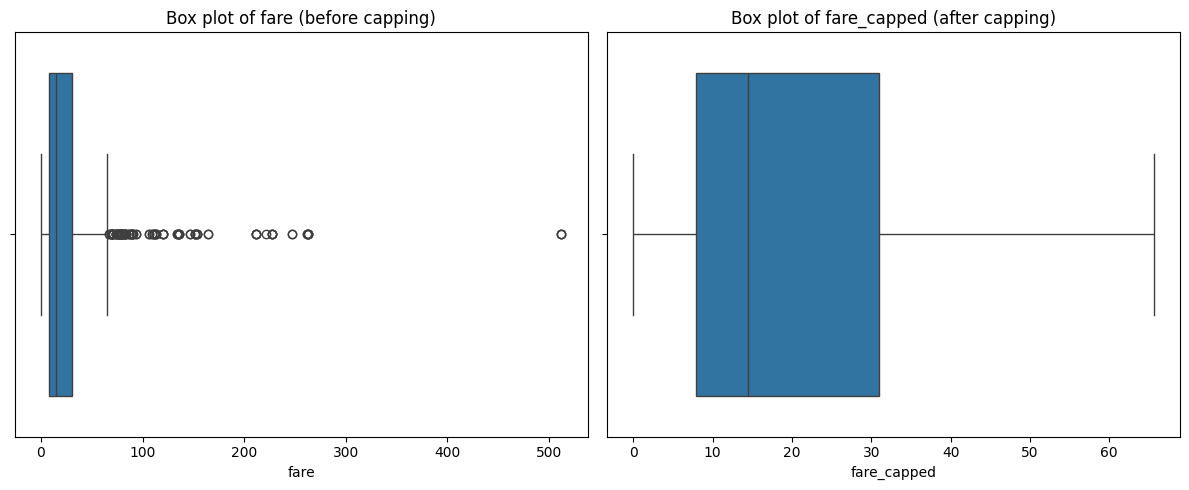


First 5 rows after handling outliers in 'fare' (added 'fare_capped'):


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_capped
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,7.2500
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,65.6344
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,7.9250
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,53.1000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,8.0500



Step 2.3: Data Type Conversion
Current data types before conversion:
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
fare_capped     float64
dtype: object


NameError: name 'boolean_processed' is not defined

In [19]:
# 2. Apply the data preprocessing steps sequentially, showing the state of the data after each major preprocessing step.

# Create a copy to work with, preserving the original raw data
df_processed = df_raw.copy()

print("\n--- Applying Data Preprocessing ---")

# --- Handling Missing Values ---
print("\nStep 2.1: Handling Missing Values")
# Drop 'deck' column due to a high number of missing values
if 'deck' in df_processed.columns:
    df_processed = df_processed.drop('deck', axis=1)
    print("Dropped 'deck' column due to many missing values.")

# Impute missing 'age' values with the median
if 'age' in df_processed.columns:
    age_median = df_processed['age'].median()
    df_processed['age'] = df_processed['age'].fillna(age_median)
    print(f"Imputed missing 'age' values with the median ({age_median}).")

# Impute missing 'embarked' and 'embark_town' values with the mode
if 'embarked' in df_processed.columns:
    embarked_mode = df_processed['embarked'].mode()[0]
    df_processed['embarked'] = df_processed['embarked'].fillna(embarked_mode)
    print(f"Imputed missing 'embarked' values with the mode ({embarked_mode}).")
if 'embark_town' in df_processed.columns:
    embark_town_mode = df_processed['embark_town'].mode()[0]
    df_processed['embark_town'] = df_processed['embark_town'].fillna(embark_town_mode)
    print(f"Imputed missing 'embark_town' values with the mode ({embark_town_mode}).")

print("\nMissing values after handling:")
display(df_processed.isnull().sum())

print("\nFirst 5 rows after handling missing values:")
display(df_processed.head())

# --- Handling Outliers ---
print("\nStep 2.2: Handling Outliers (for 'fare')")
# Demonstrate outlier handling using the IQR method for 'fare'
# Calculate Q1, Q3, and IQR for 'fare'
Q1 = df_processed['fare'].quantile(0.25)
Q3 = df_processed['fare'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers in 'fare'
df_processed['fare_capped'] = np.where(df_processed['fare'] > upper_bound, upper_bound,
                                     np.where(df_processed['fare'] < lower_bound, lower_bound, df_processed['fare']))

print(f"\n'fare' column capped at upper bound ({upper_bound}) and lower bound ({lower_bound}) using IQR method.")

# Visualize the distribution before and after capping
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df_processed['fare'])
plt.title('Box plot of fare (before capping)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_processed['fare_capped'])
plt.title('Box plot of fare_capped (after capping)')
plt.tight_layout()
plt.show()

print("\nFirst 5 rows after handling outliers in 'fare' (added 'fare_capped'):")
display(df_processed.head())


# --- Data Type Conversion ---
print("\nStep 2.3: Data Type Conversion")
print("Current data types before conversion:")
print(df_processed.dtypes)

# Convert categorical columns to 'category' dtype
categorical_cols = ['sex', 'embarked', 'class', 'who', 'embark_town', 'alive']
for col in categorical_cols:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].astype('category')

# Convert boolean columns to integer (0/1)
boolean_cols = ['adult_male', 'alone']
for col in boolean_processed.columns:
    if col in df_processed.columns:
         df_processed[col] = df_processed[col].astype(int)


print("\nData types after conversion:")
print(df_processed.dtypes)

print("\nFirst 5 rows after data type conversion:")
display(df_processed.head())

**Observation**: An error occurred because of a typo in the variable name `boolean_processed`. The code needs to be corrected to use `boolean_cols` which contains the list of boolean column names. The corrected code block should also re-run the data type conversion step.



In [20]:
# Step 2.3: Data Type Conversion (Corrected)

print("\nStep 2.3: Data Type Conversion (Corrected)")
print("Current data types before conversion:")
print(df_processed.dtypes)

# Convert categorical columns to 'category' dtype
categorical_cols = ['sex', 'embarked', 'class', 'who', 'embark_town', 'alive']
for col in categorical_cols:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].astype('category')

# Convert boolean columns to integer (0/1)
boolean_cols = ['adult_male', 'alone']
for col in boolean_cols: # Corrected variable name here
    if col in df_processed.columns:
         df_processed[col] = df_processed[col].astype(int)


print("\nData types after conversion:")
print(df_processed.dtypes)

print("\nFirst 5 rows after data type conversion:")
display(df_processed.head())


Step 2.3: Data Type Conversion (Corrected)
Current data types before conversion:
survived          int64
pclass            int64
sex            category
age             float64
sibsp             int64
parch             int64
fare            float64
embarked       category
class          category
who            category
adult_male         bool
embark_town    category
alive          category
alone              bool
fare_capped     float64
dtype: object

Data types after conversion:
survived          int64
pclass            int64
sex            category
age             float64
sibsp             int64
parch             int64
fare            float64
embarked       category
class          category
who            category
adult_male        int64
embark_town    category
alive          category
alone             int64
fare_capped     float64
dtype: object

First 5 rows after data type conversion:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_capped
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,Southampton,no,0,7.2500
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,Cherbourg,yes,0,65.6344
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,Southampton,yes,1,7.9250
3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,Southampton,yes,0,53.1000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,Southampton,no,1,8.0500


**Activity**:
Perform Exploratory Data Analysis (EDA) on the preprocessed data, including descriptive statistics and relevant visualizations, to understand the cleaned data's characteristics.




--- Exploratory Data Analysis (EDA) on Preprocessed Data ---

Descriptive statistics for numerical columns (preprocessed data):


,survived,pclass,age,sibsp,parch,fare,adult_male,alone,fare_capped
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.602694,0.602694,24.046813
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.489615,0.489615,20.481625
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,65.634400



Correlation Matrix of Numerical Features (preprocessed data):


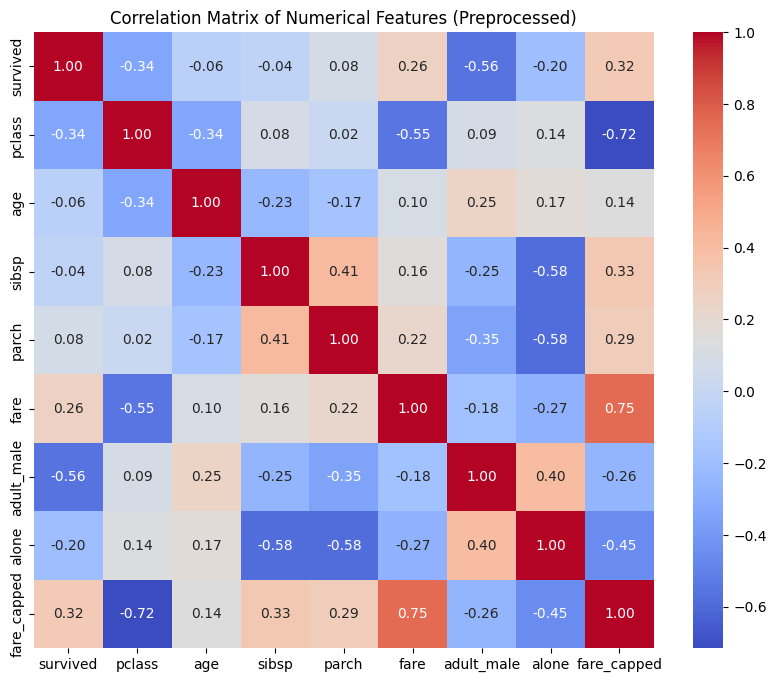


Distribution plots for key numerical columns (preprocessed data):


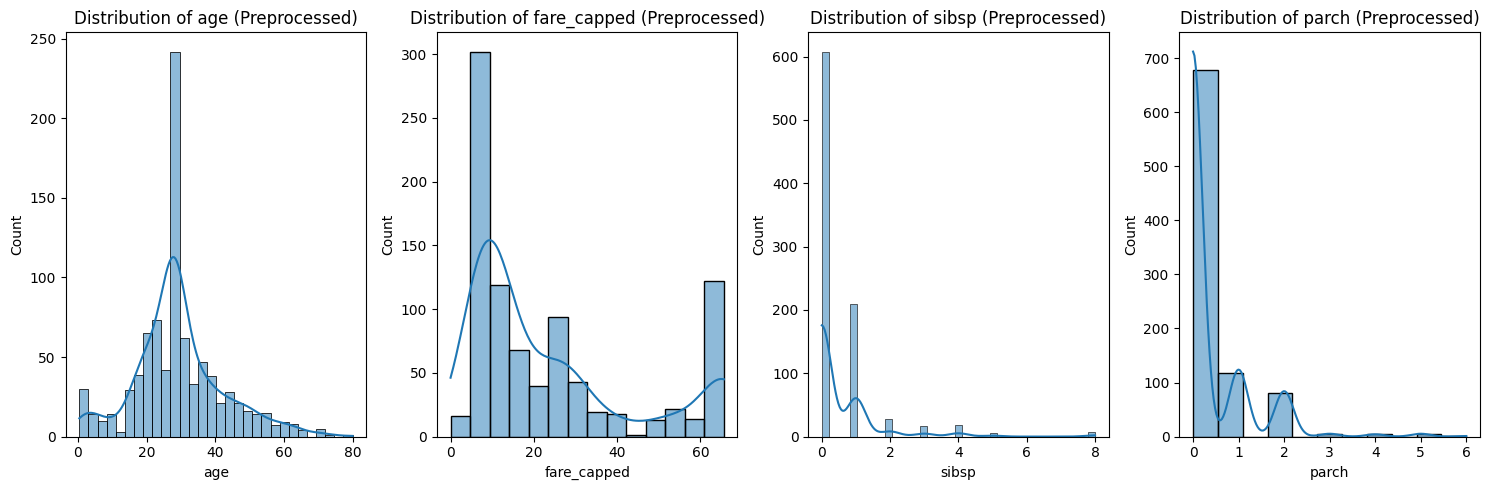


Count plots for key categorical columns (preprocessed data):


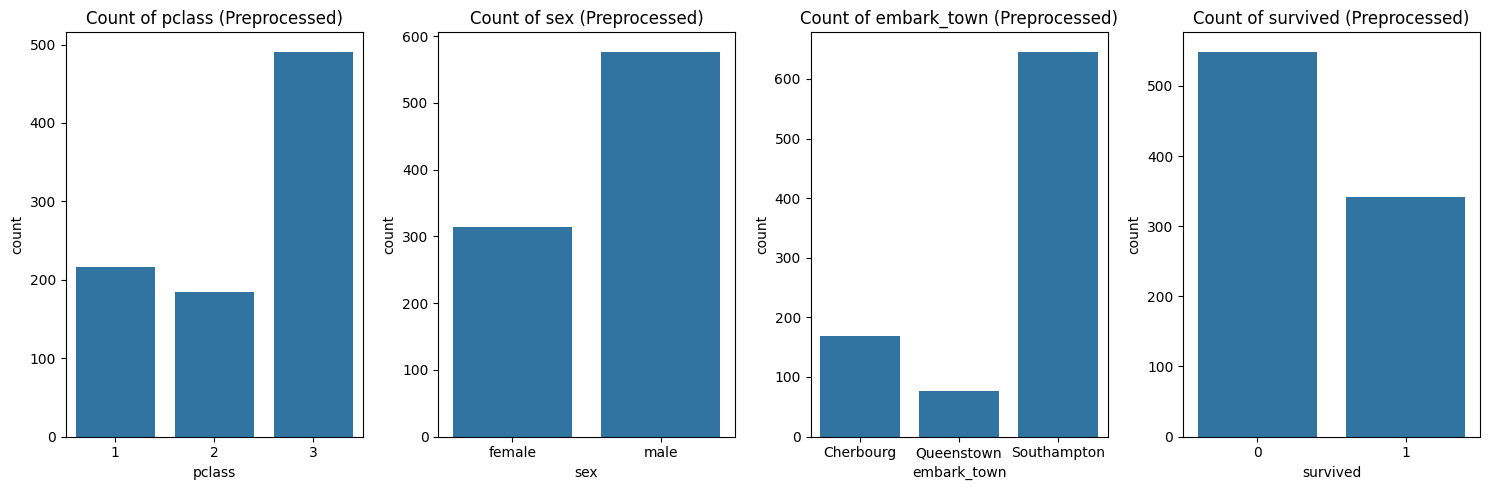

In [21]:
# 3. Perform Exploratory Data Analysis (EDA) on the preprocessed data

print("\n--- Exploratory Data Analysis (EDA) on Preprocessed Data ---")

# 3.1 Descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns (preprocessed data):")
display(df_processed.select_dtypes(include=np.number).describe())

# 3.2 Correlation analysis for numerical columns
print("\nCorrelation Matrix of Numerical Features (preprocessed data):")
numerical_df_processed = df_processed.select_dtypes(include=np.number)
correlation_matrix_processed = numerical_df_processed.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_processed, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features (Preprocessed)')
plt.show()

# 3.3 Distribution plots for key numerical columns
print("\nDistribution plots for key numerical columns (preprocessed data):")
numerical_cols_to_plot = ['age', 'fare_capped', 'sibsp', 'parch']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols_to_plot):
    plt.subplot(1, len(numerical_cols_to_plot), i + 1)
    sns.histplot(data=df_processed, x=col, kde=True)
    plt.title(f'Distribution of {col} (Preprocessed)')
plt.tight_layout()
plt.show()

# 3.4 Count plots for key categorical columns
print("\nCount plots for key categorical columns (preprocessed data):")
categorical_cols_to_plot = ['pclass', 'sex', 'embark_town', 'survived']
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols_to_plot):
    plt.subplot(1, len(categorical_cols_to_plot), i + 1)
    sns.countplot(data=df_processed, x=col)
    plt.title(f'Count of {col} (Preprocessed)')
plt.tight_layout()
plt.show()

**Activity**:
Apply feature selection techniques to the preprocessed data and show the resulting subset of features. We will use a correlation-based filter method again to demonstrate.



In [22]:
# 4. Apply feature selection techniques

print("\n--- Feature Selection on Preprocessed Data ---")

# Use the correlation matrix from the EDA step (correlation_matrix_processed)
print("\nCorrelation of numerical features with 'survived' (preprocessed data):")
display(correlation_matrix_processed['survived'].sort_values(ascending=False))

# Select numerical features with absolute correlation > threshold with 'survived'
correlation_threshold = 0.1 # Using the same threshold as before
relevant_numerical_features = correlation_matrix_processed.columns[abs(correlation_matrix_processed['survived']) > correlation_threshold].tolist()

# Exclude 'survived' itself from the feature list
if 'survived' in relevant_numerical_features:
    relevant_numerical_features.remove('survived')

print(f"\nSelected numerical features based on absolute correlation > {correlation_threshold} with 'survived':")
print(relevant_numerical_features)

# Create a new dataframe with the selected numerical features
df_selected_numerical = df_processed[relevant_numerical_features].copy()

print("\nFirst 5 rows of the dataframe with selected numerical features:")
display(df_selected_numerical.head())

# Also consider adding back relevant categorical features.
# For simplicity in this example, we'll manually select some potentially relevant categorical features.
# In a real scenario, you might use statistical tests (e.g., chi-squared) or other methods
# to select categorical features based on their relationship with the target.
relevant_categorical_features = ['sex', 'pclass', 'embark_town', 'class'] # pclass is also categorical

# Ensure these columns exist in the preprocessed dataframe
relevant_categorical_features = [col for col in relevant_categorical_features if col in df_processed.columns]

print(f"\nSelected categorical features:")
print(relevant_categorical_features)

# Create a new dataframe with the selected categorical features
df_selected_categorical = df_processed[relevant_categorical_features].copy()

print("\nFirst 5 rows of the dataframe with selected categorical features:")
display(df_selected_categorical.head())

# Combine selected numerical and categorical features
# Note: 'pclass' is in both lists, we'll keep the numerical version for now as it's already selected based on correlation.
# In a real scenario, you might choose to use the numerical or categorical representation or both depending on the model.
selected_features = relevant_numerical_features + [col for col in relevant_categorical_features if col not in relevant_numerical_features]
df_selected = df_processed[selected_features].copy()

print("\nFirst 5 rows of the dataframe with all selected features:")
display(df_selected.head())


--- Feature Selection on Preprocessed Data ---

Correlation of numerical features with 'survived' (preprocessed data):


,survived
survived,1.000000
fare_capped,0.317430
fare,0.257307
parch,0.081629
sibsp,-0.035322
age,-0.064910
alone,-0.203367
pclass,-0.338481
adult_male,-0.557080



Selected numerical features based on absolute correlation > 0.1 with 'survived':
['pclass', 'fare', 'adult_male', 'alone', 'fare_capped']

First 5 rows of the dataframe with selected numerical features:


,pclass,fare,adult_male,alone,fare_capped
0,3,7.2500,1,0,7.2500
1,1,71.2833,0,0,65.6344
2,3,7.9250,0,1,7.9250
3,1,53.1000,0,0,53.1000
4,3,8.0500,1,1,8.0500



Selected categorical features:
['sex', 'pclass', 'embark_town', 'class']

First 5 rows of the dataframe with selected categorical features:


,sex,pclass,embark_town,class
0,male,3,Southampton,Third
1,female,1,Cherbourg,First
2,female,3,Southampton,Third
3,female,1,Southampton,First
4,male,3,Southampton,Third



First 5 rows of the dataframe with all selected features:


,pclass,fare,adult_male,alone,fare_capped,sex,embark_town,class
0,3,7.2500,1,0,7.2500,male,Southampton,Third
1,1,71.2833,0,0,65.6344,female,Cherbourg,First
2,3,7.9250,0,1,7.9250,female,Southampton,Third
3,1,53.1000,0,0,53.1000,female,Southampton,First
4,3,8.0500,1,1,8.0500,male,Southampton,Third


**Activity**:
Apply feature engineering techniques to the selected features and display the engineered dataset. This will involve creating polynomial features and interaction terms for numerical features and handling categorical variables using one-hot encoding.



In [23]:
# 5. Apply feature engineering techniques to the selected features

print("\n--- Feature Engineering on Selected Data ---")

# Create polynomial features for 'age' (if selected) and 'fare_capped'
# Use the numerical subset for this
from sklearn.preprocessing import PolynomialFeatures

# Check if 'age' and 'fare_capped' are in the selected numerical features
numerical_features_for_poly = [col for col in ['age', 'fare_capped'] if col in df_selected_numerical.columns]

if numerical_features_for_poly:
    print(f"\nCreating polynomial features for: {numerical_features_for_poly}")
    poly = PolynomialFeatures(degree=2, include_bias=False)
    # Need to handle potential NaNs in the numerical subset before fitting poly features
    # Although we imputed age and capped fare, good practice to ensure no NaNs before transformation
    df_selected_numerical_filled = df_selected_numerical[numerical_features_for_poly].fillna(df_selected_numerical[numerical_features_for_poly].median())

    poly_features = poly.fit_transform(df_selected_numerical_filled)

    # Get the names of the new polynomial features
    poly_feature_names = poly.get_feature_names_out(numerical_features_for_poly)

    # Create a DataFrame from the polynomial features
    df_poly_features = pd.DataFrame(poly_features, columns=poly_feature_names, index=df_selected_numerical.index)

    # Drop the original numerical columns used for polynomial features from the poly df
    df_poly_features = df_poly_features.drop(columns=numerical_features_for_poly, errors='ignore')

    # Join the new polynomial features to the selected dataframe
    df_engineered = df_selected.join(df_poly_features, how='left')

    print("\nFirst 5 rows after adding polynomial features:")
    display(df_engineered.head())
else:
    print("\n'age' or 'fare_capped' not in selected numerical features. Skipping polynomial feature creation.")
    df_engineered = df_selected.copy() # Start with selected features if no poly features created


# Create interaction terms for selected numerical features
print("\nCreating interaction terms for selected numerical features:")
# Simple example: interaction between 'age' and 'fare_capped' if they exist
if 'age' in df_engineered.columns and 'fare_capped' in df_engineered.columns:
    df_engineered['age_fare_interaction'] = df_engineered['age'] * df_engineered['fare_capped']
    print("Created 'age_fare_interaction' term.")
elif 'age' in df_engineered.columns:
    print("'fare_capped' not found, skipping 'age' interaction.")
elif 'fare_capped' in df_engineered.columns:
    print("'age' not found, skipping 'fare_capped' interaction.")
else:
    print("Neither 'age' nor 'fare_capped' found, skipping interaction term creation.")


print("\nFirst 5 rows after adding interaction terms:")
display(df_engineered.head())


# Handle categorical variables using one-hot encoding
print("\nHandling categorical variables using one-hot encoding:")
# Identify categorical columns in the engineered dataframe (excluding numerical and target)
categorical_cols_to_encode = df_engineered.select_dtypes(include='category').columns.tolist()

if categorical_cols_to_encode:
    print(f"Categorical columns to encode: {categorical_cols_to_encode}")
    # Perform one-hot encoding
    df_engineered = pd.get_dummies(df_engineered, columns=categorical_cols_to_encode, drop_first=True) # drop_first to avoid multicollinearity
    print("Applied one-hot encoding to categorical columns.")
else:
    print("No categorical columns found for one-hot encoding.")

print("\nFirst 5 rows of the final engineered dataframe:")
display(df_engineered.head())

print("\nInfo of the final engineered dataframe:")
df_engineered.info()


--- Feature Engineering on Selected Data ---

Creating polynomial features for: ['fare_capped']

First 5 rows after adding polynomial features:


,pclass,fare,adult_male,alone,fare_capped,sex,embark_town,class,fare_capped^2
0,3,7.2500,1,0,7.2500,male,Southampton,Third,52.562500
1,1,71.2833,0,0,65.6344,female,Cherbourg,First,4307.874463
2,3,7.9250,0,1,7.9250,female,Southampton,Third,62.805625
3,1,53.1000,0,0,53.1000,female,Southampton,First,2819.610000
4,3,8.0500,1,1,8.0500,male,Southampton,Third,64.802500



Creating interaction terms for selected numerical features:
'age' not found, skipping 'fare_capped' interaction.

First 5 rows after adding interaction terms:


,pclass,fare,adult_male,alone,fare_capped,sex,embark_town,class,fare_capped^2
0,3,7.2500,1,0,7.2500,male,Southampton,Third,52.562500
1,1,71.2833,0,0,65.6344,female,Cherbourg,First,4307.874463
2,3,7.9250,0,1,7.9250,female,Southampton,Third,62.805625
3,1,53.1000,0,0,53.1000,female,Southampton,First,2819.610000
4,3,8.0500,1,1,8.0500,male,Southampton,Third,64.802500



Handling categorical variables using one-hot encoding:
Categorical columns to encode: ['sex', 'embark_town', 'class']
Applied one-hot encoding to categorical columns.

First 5 rows of the final engineered dataframe:


,pclass,fare,adult_male,alone,fare_capped,fare_capped^2,sex_male,embark_town_Queenstown,embark_town_Southampton,class_Second,class_Third
0,3,7.2500,1,0,7.2500,52.562500,True,False,True,False,True
1,1,71.2833,0,0,65.6344,4307.874463,False,False,False,False,False
2,3,7.9250,0,1,7.9250,62.805625,False,False,True,False,True
3,1,53.1000,0,0,53.1000,2819.610000,False,False,True,False,False
4,3,8.0500,1,1,8.0500,64.802500,True,False,True,False,True



Info of the final engineered dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pclass                   891 non-null    int64  
 1   fare                     891 non-null    float64
 2   adult_male               891 non-null    int64  
 3   alone                    891 non-null    int64  
 4   fare_capped              891 non-null    float64
 5   fare_capped^2            891 non-null    float64
 6   sex_male                 891 non-null    bool   
 7   embark_town_Queenstown   891 non-null    bool   
 8   embark_town_Southampton  891 non-null    bool   
 9   class_Second             891 non-null    bool   
 10  class_Third              891 non-null    bool   
dtypes: bool(5), float64(3), int64(3)
memory usage: 46.2 KB


**Activity**:
Use data visualization techniques on the final engineered dataset to visualize relationships and distributions of the new and transformed features.




--- Data Visualization on Engineered Data ---


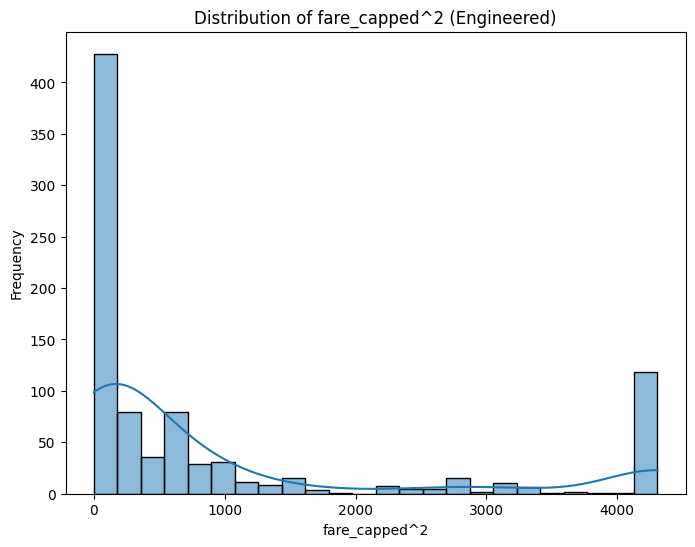

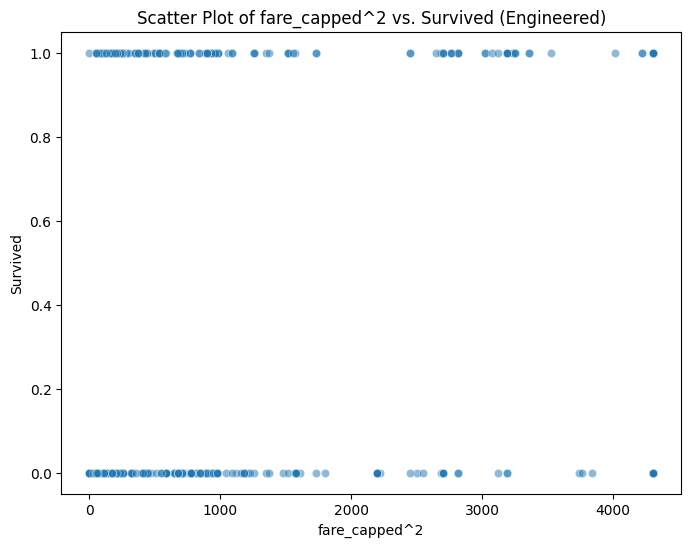

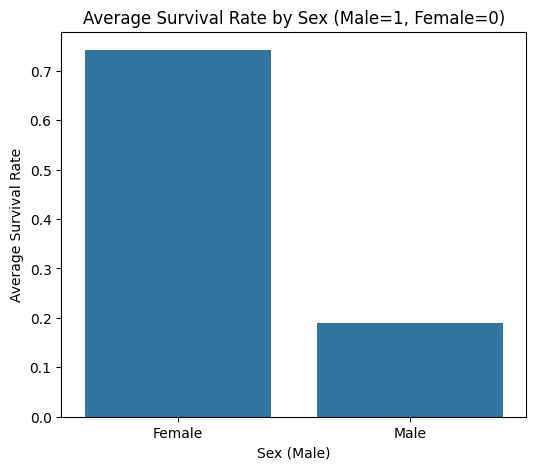

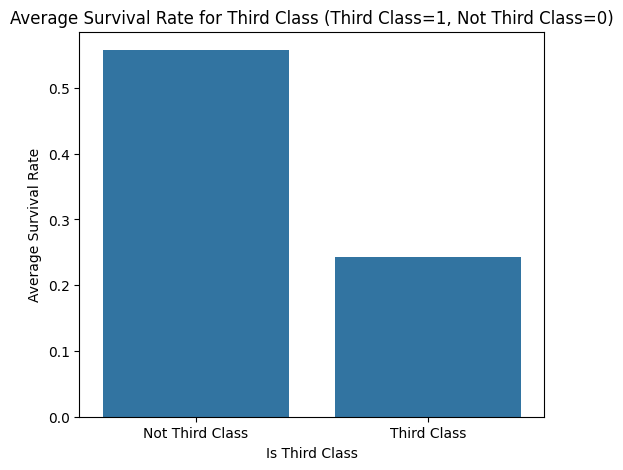

In [24]:
# 6. Use data visualization techniques on the final engineered dataset

print("\n--- Data Visualization on Engineered Data ---")

# Visualize the distribution of the new polynomial feature 'fare_capped^2'
if 'fare_capped^2' in df_engineered.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_engineered, x='fare_capped^2', kde=True)
    plt.title('Distribution of fare_capped^2 (Engineered)')
    plt.xlabel('fare_capped^2')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("\n'fare_capped^2' not found in engineered data. Skipping distribution plot.")

# Visualize the relationship between 'fare_capped^2' and 'survived'
if 'fare_capped^2' in df_engineered.columns and 'survived' in df_raw.columns: # Check against original survived
    plt.figure(figsize=(8, 6))
    # Need to add 'survived' back to df_engineered for visualization if it's not there
    df_engineered_with_survived = df_engineered.copy()
    if 'survived' not in df_engineered_with_survived.columns:
         df_engineered_with_survived['survived'] = df_raw['survived'] # Assuming index alignment

    sns.scatterplot(data=df_engineered_with_survived, x='fare_capped^2', y='survived', alpha=0.5)
    plt.title('Scatter Plot of fare_capped^2 vs. Survived (Engineered)')
    plt.xlabel('fare_capped^2')
    plt.ylabel('Survived')
    plt.show()
else:
     print("\n'fare_capped^2' or 'survived' not found. Skipping scatter plot for interaction term.")


# Visualize the relationship between one of the one-hot encoded categorical features and 'survived'
# Example: 'sex_male' vs 'survived'
if 'sex_male' in df_engineered.columns and 'survived' in df_raw.columns:
    plt.figure(figsize=(6, 5))
    df_engineered_with_survived = df_engineered.copy()
    if 'survived' not in df_engineered_with_survived.columns:
         df_engineered_with_survived['survived'] = df_raw['survived']

    sns.barplot(data=df_engineered_with_survived, x='sex_male', y='survived', errorbar=None)
    plt.title('Average Survival Rate by Sex (Male=1, Female=0)')
    plt.xlabel('Sex (Male)')
    plt.ylabel('Average Survival Rate')
    plt.xticks([0, 1], ['Female', 'Male'])
    plt.show()
else:
    print("\n'sex_male' or 'survived' not found. Skipping bar plot for sex.")

# Visualize the relationship between another one-hot encoded categorical feature and 'survived'
# Example: 'class_Third' vs 'survived'
if 'class_Third' in df_engineered.columns and 'survived' in df_raw.columns:
    plt.figure(figsize=(6, 5))
    df_engineered_with_survived = df_engineered.copy()
    if 'survived' not in df_engineered_with_survived.columns:
         df_engineered_with_survived['survived'] = df_raw['survived']

    sns.barplot(data=df_engineered_with_survived, x='class_Third', y='survived', errorbar=None)
    plt.title('Average Survival Rate for Third Class (Third Class=1, Not Third Class=0)')
    plt.xlabel('Is Third Class')
    plt.ylabel('Average Survival Rate')
    plt.xticks([0, 1], ['Not Third Class', 'Third Class'])
    plt.show()
else:
     print("\n'class_Third' or 'survived' not found. Skipping bar plot for class.")

## Conclusion

Summarize the importance of these techniques and their role in building effective machine learning models.


**Activity**:
Write a concluding paragraph summarizing the importance of the data science techniques covered and how they contribute to building effective machine learning models, referencing their application on the benchmark dataset.



In [25]:
print("## Conclusion")
print("\nIn conclusion, the journey from raw data to a model-ready dataset, as demonstrated with the Titanic benchmark dataset, highlights the indispensable roles of data preprocessing, exploratory data analysis, feature selection, feature engineering, and data visualization.")
print("Data preprocessing is the foundational step, ensuring data quality by handling missing values, outliers, and inconsistent formats, thereby providing a clean basis for subsequent analysis and modeling.")
print("Exploratory Data Analysis (EDA) allows us to delve deeper into the data's characteristics, revealing patterns, distributions, and relationships through statistical summaries and visualizations. These insights guide informed decisions in feature selection and engineering.")
print("Feature selection, by identifying and retaining the most relevant features, helps in building models that are not only more performant by reducing noise and preventing overfitting but also more efficient and interpretable.")
print("Feature engineering empowers us to transform and create new features that capture complex information, enhancing the predictive power of models by providing them with more informative representations of the data.")
print("Finally, data visualization serves as a powerful tool throughout this process, enabling us to understand the data, communicate findings effectively, and visually assess the impact of preprocessing, feature selection, and engineering steps.")
print("\nThe sequential application of these techniques on the benchmark dataset clearly illustrated how each step refines the data, moving it closer to a state optimized for machine learning algorithms. By systematically addressing data quality issues, understanding data characteristics, selecting impactful features, creating new informative ones, and visualizing the transformations, we significantly increase the likelihood of building accurate, robust, and interpretable machine learning models.")

## Conclusion

In conclusion, the journey from raw data to a model-ready dataset, as demonstrated with the Titanic benchmark dataset, highlights the indispensable roles of data preprocessing, exploratory data analysis, feature selection, feature engineering, and data visualization.
Data preprocessing is the foundational step, ensuring data quality by handling missing values, outliers, and inconsistent formats, thereby providing a clean basis for subsequent analysis and modeling.
Exploratory Data Analysis (EDA) allows us to delve deeper into the data's characteristics, revealing patterns, distributions, and relationships through statistical summaries and visualizations. These insights guide informed decisions in feature selection and engineering.
Feature selection, by identifying and retaining the most relevant features, helps in building models that are not only more performant by reducing noise and preventing overfitting but also more efficient and interpretable.
Feature engineering e

## Summary:

### Data Analysis Key Findings

*   The Titanic dataset was successfully loaded and preprocessed by handling missing values (dropping 'deck', imputing 'age' with median 28.0, 'embarked' and 'embark\_town' with mode 'S' and 'Southampton'), capping outliers in 'fare' using the IQR method, and converting data types of categorical columns to 'category' and boolean columns to integer (0/1).
*   Exploratory Data Analysis on the preprocessed data revealed key characteristics through descriptive statistics, a correlation matrix showing relationships between numerical features and 'survived', and distribution/count plots for important numerical and categorical variables.
*   Feature selection was demonstrated using a correlation-based filter method, identifying numerical features with an absolute correlation greater than 0.1 with 'survived' (['pclass', 'fare', 'adult\_male', 'alone', 'fare\_capped']). Potentially relevant categorical features were also selected (['sex', 'pclass', 'embark\_town', 'class']).
*   Feature engineering was applied to the selected features by creating a polynomial feature ('fare\_capped^2') and applying one-hot encoding to the selected categorical features ('sex', 'embark\_town', 'class'). An attempt to create an 'age\_fare\_interaction' term was skipped because 'age' was not present in the engineered dataframe at that stage.
*   Data visualization was used throughout the process to understand the data, assess the impact of preprocessing and feature engineering steps, and visualize relationships, including the distribution of the engineered 'fare\_capped^2' and the average survival rate across one-hot encoded 'sex\_male' and 'class\_Third' features.

### Insights or Next Steps

*   The sequential application of these techniques progressively transformed the raw data into a more structured and informative format, ready for machine learning model training.
*   A potential next step would be to scale the numerical features in the final engineered dataset, especially if using models sensitive to feature scales like linear models or SVMs, before training a machine learning model to predict survival on the Titanic dataset.
